# Mental Health

## Data Understanding

The dataset contains the following columns:

| Column | Description                                                                                                          |
| --- |----------------------------------------------------------------------------------------------------------------------|
| **Age** | Person's Age                                                                                                         |
| **Gender** | Person's Gender                                                                                                      |
|  **Country** | Person's Country                                                                                                     |
|  **state** | If you live in the United States, which state or territory do you live in?                                           |
|  **self_employed** | Are you self-employed?                                                                                               |
|  **family_history** | Do you have a family history of mental illness?                                                                      |
|  **treatment** | Have you sought treatment for a mental health condition?                                                             |
|  **work_interfere** | If you have a mental health condition, do you feel that it interferes with your work?                                |
|  **no_employees** | How many employees does your company or organization have?                                                           |
|  **remote_work** | Do you work remotely (outside of office) at least 50% of the time?                                                   |
|  **tech_company** | Is your employer primarily a tech company/organization?                                                              |
|  **benefits** | Does your employer provide mental health benefits?                                                                   |
|  **care_options** | Do you know the options for mental health care your employer provides?                                               |
|  **wellness_program** | Has your employer ever discussed mental health as part of an employee wellness program?                              |
|  **seek_help** | Does your employer provide resources to learn more about mental health issues and how to seek help?                  |
|  **anonymity** | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? |
|  **leave** | How easy is it for you to take medical leave for a mental health condition?                                          |
|  **mental_health_consequence** | Do you think that discussing a mental health issue with your employer would have negative                            | consequences?
|  **phys_health_consequence** | Do you think that discussing a physical health issue with your employer would have negative consequences?            |
|  **coworkers** | Would you be willing to discuss a mental health issue with your coworkers?                                           |
|  **supervisor** | Would you be willing to discuss a mental health issue with your direct supervisor(s)?                                |
|  **mental_health_interview** | Would you bring up a mental health issue with a potential employer in an interview?                                  |
|  **phys_health_interview** | Would you bring up a physical health issue with a potential employer in an interview?                                |
|  **mental_vs_physical** | Do you feel that your employer takes mental health as seriously as physical health?                                  |
|  **obs_consequence** | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?   |
|  **comments** | Any additional notes or comments                                                                                     |

In [1]:
# Import libraries
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
survey_df = pd.read_csv('data/survey.csv')

In [3]:
# Examine first 5 rows
survey_df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Examine dataset structure to identify possible changes needed in datatypes
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

### Findings:
- Object types will be convented to category types for a more efficient memory usage, this will be addressed during data preparation

In [5]:
# Count NA values to identify missing data
survey_df.isna().sum()[lambda x: x > 0]

state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64

### Findings:
- Comments column will be removed since it is mostly empty and won't be used
- Timestamp column will be removed since it is not relevant

In [6]:
survey_df.drop(columns=['comments'], inplace=True)
survey_df.drop(columns=['Timestamp'], inplace=True)

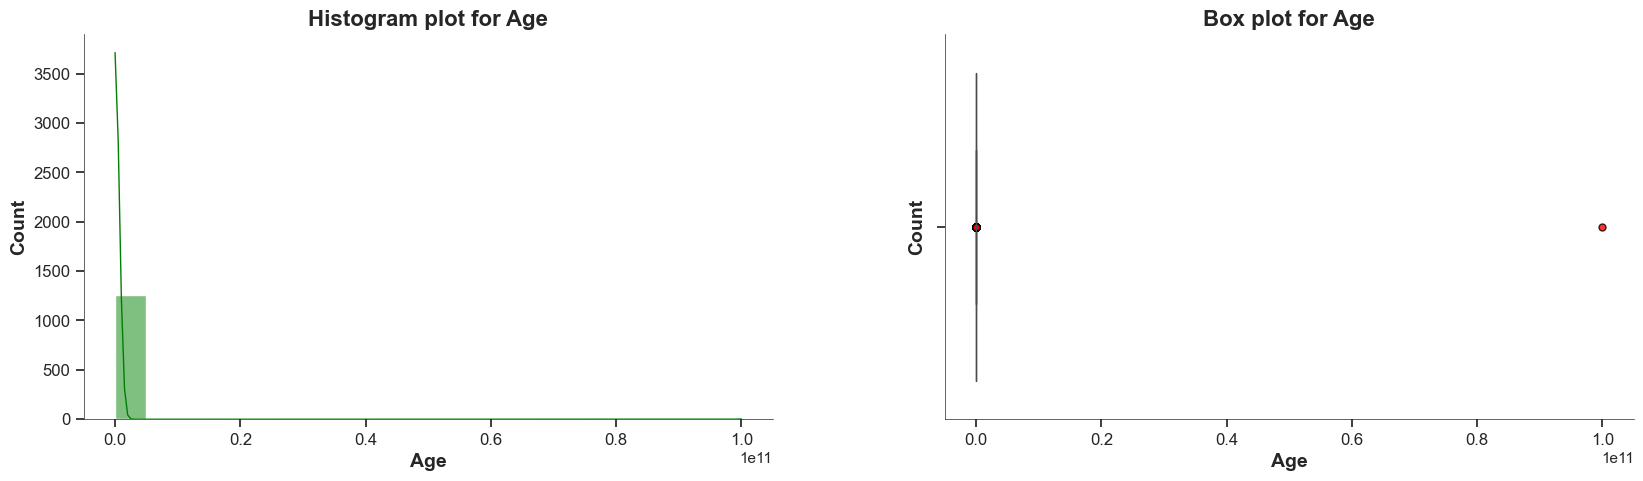

In [7]:
# Create histograms and box plots for numeric columns to inspect their distributions and possible outliers.
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'lines.linewidth': 1, 'axes.linewidth': 0.5}
sns.set_theme(style="ticks", rc=custom_params, palette='Set2')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.25)

col = 'Age'

sns.histplot(
    data=survey_df, x=col, bins=20, kde=True, ax=axes[0],
    color='green'
)
axes[0].set_title('Histogram plot for ' + col, fontsize=16, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=12)

flier_props = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='red', alpha=0.8)
sns.boxplot(
    data=survey_df, x=col, ax=axes[1],
    color='blue', flierprops=flier_props,
)
axes[1].set_title('Box plot for ' + col, fontsize=16, fontweight='bold')
axes[1].set_xlabel('Age', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=12)

plt.show()

In [8]:
# Inspect age value counts to identify age range
survey_df['Age'].value_counts(dropna=False).sort_index()

-1726            1
-29              1
-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 99999999999

### Findings:
- Age column contains outliers, this will be addressed during data preparation

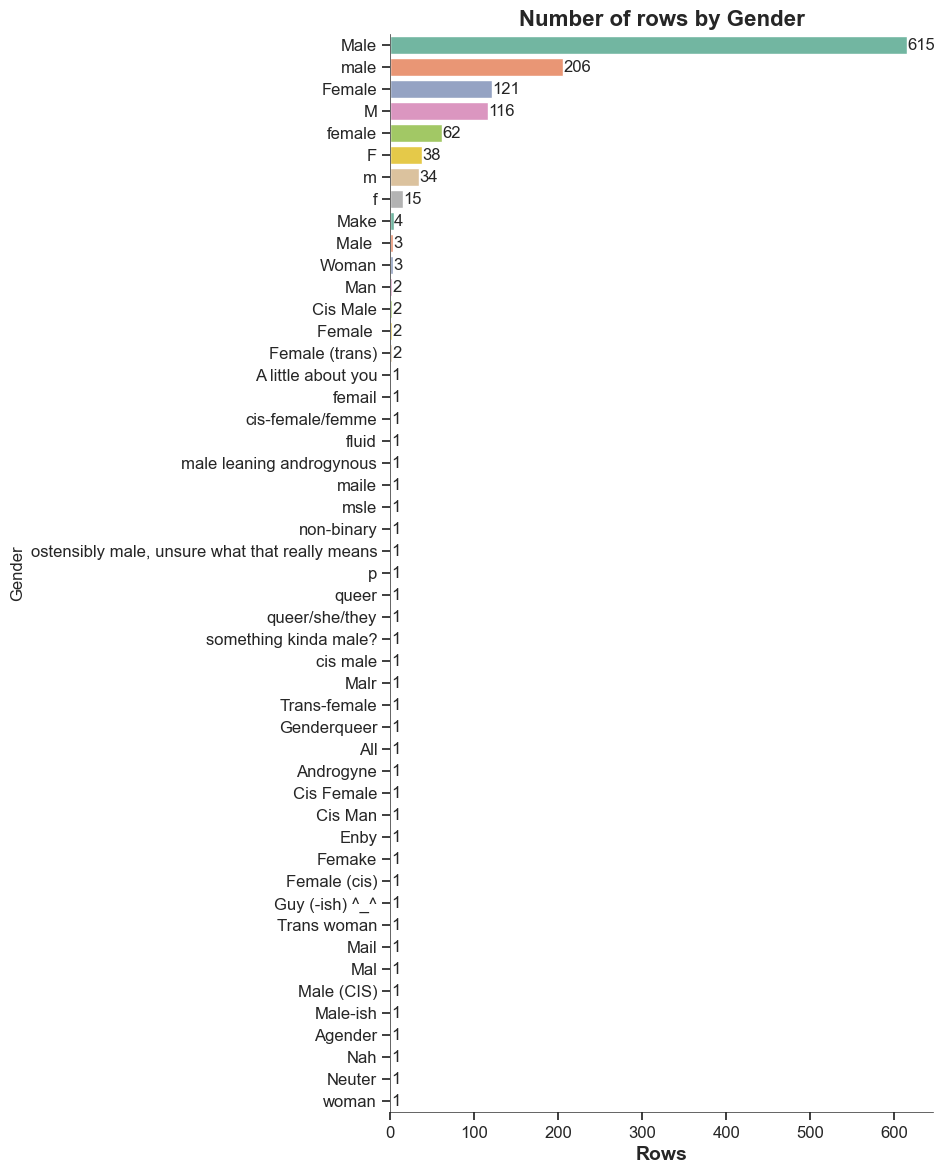

In [9]:
# Analyze gender column
grouped_values = survey_df.groupby(['Gender'])['Gender'].aggregate('count').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(7, 14))
sns.barplot(y=grouped_values.index, x=grouped_values.values, palette='Set2')
ax.set_title('Number of rows by Gender', fontsize=16, fontweight='bold')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Rows', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
plt.show()

### Findings:
- Gender column presents different values to identify gender, this column needs to be standardized during data preparation.

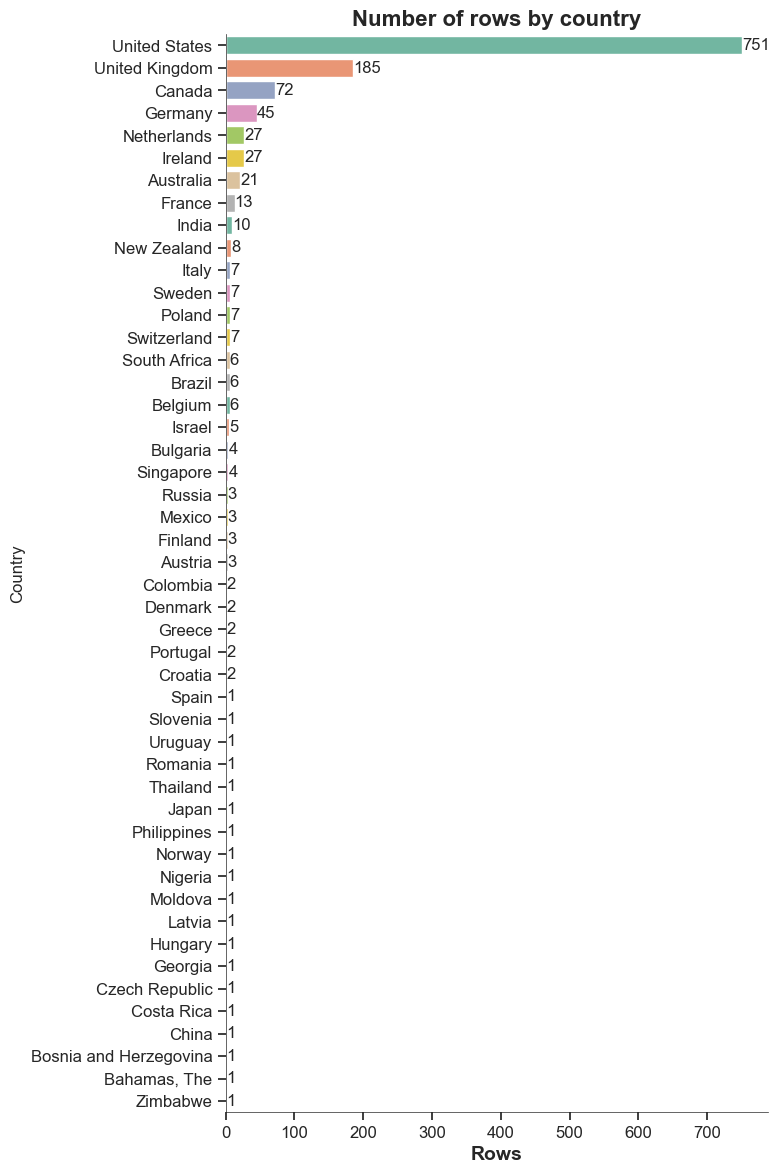

In [10]:
# Analyze country column
grouped_values = survey_df.groupby(['Country'])['Country'].aggregate('count').sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(7, 14))
sns.barplot(y=grouped_values.index, x=grouped_values.values, palette='Set2')
ax.set_title('Number of rows by country', fontsize=16, fontweight='bold')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Rows', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
plt.show()

### Findings:
- By examining country, we can infer that data was mostly collected in the U.S.

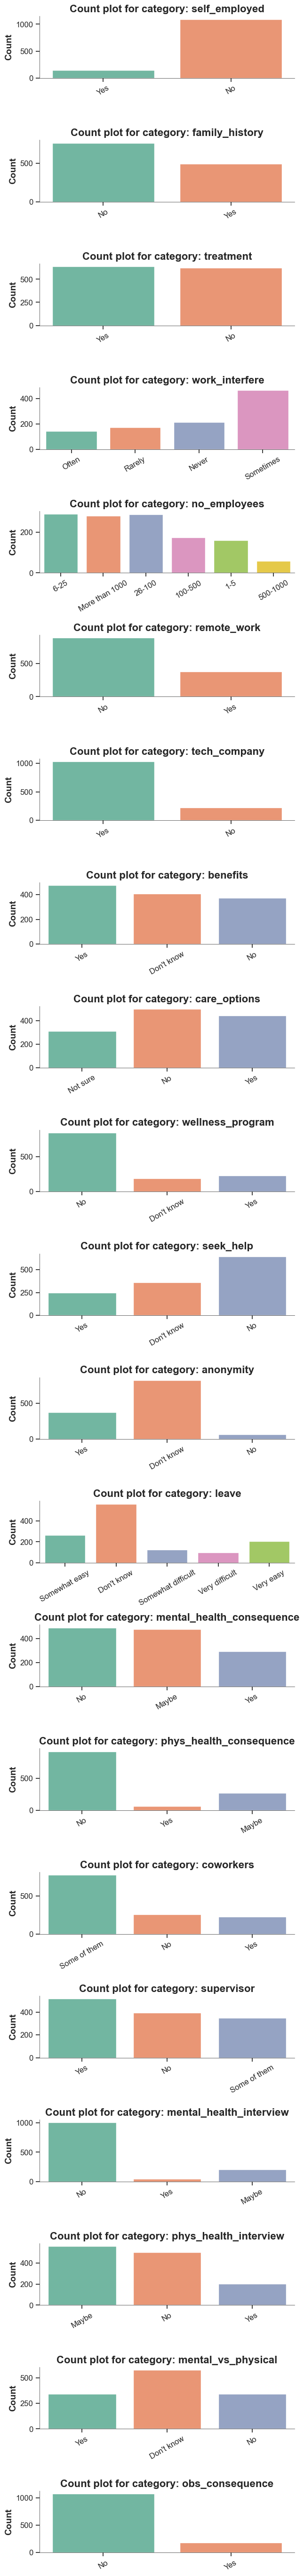

In [11]:
# Create count plots for categorical columns
fig, axes = plt.subplots(nrows=21, ncols=1, figsize=(7, 70))
fig.subplots_adjust(hspace=1, wspace=1)

list1 = ['Gender', 'Country', 'state']
i = 0
for col in survey_df.columns:
    if (survey_df[col].dtype == 'object') and (col not in list1):
        sns.countplot(data=survey_df, x=col, ax=axes[i])
        axes[i].set_title('Count plot for category: ' + col, fontsize=16, fontweight='bold')
        axes[i].set_xlabel('', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
        axes[i].tick_params(axis='both', labelsize=12)
        axes[i].tick_params(axis='x', labelrotation=30)
        i = i + 1

plt.show()

### Findings:
- Work interfere column contains NAN values that will be imputed during data preparation
- All the columns are categorical, therefore we will apply one-hot encoding during data preparation
- Treatment column will be the target variable

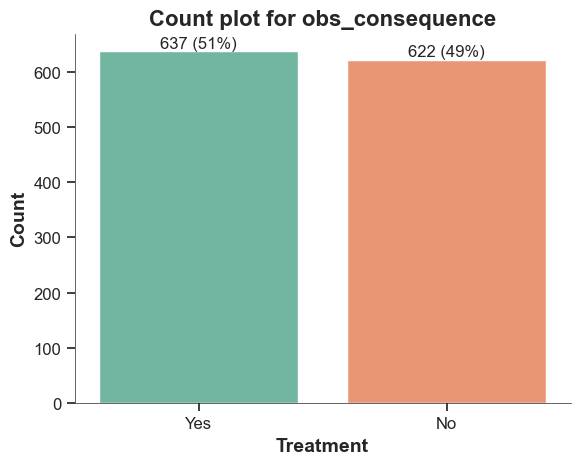

In [12]:
# Examine the target class
ax = sns.countplot(
    x=survey_df['treatment'],
    order=survey_df['treatment'].value_counts(ascending=False).index,
)

abs_values = survey_df['treatment'].value_counts(ascending=False)
rel_values = survey_df['treatment'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=labels, fontsize=12)
ax.set_title('Count plot for ' + col, fontsize=16, fontweight='bold')
ax.set_xlabel('Treatment', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

### Findings:
- Target class is balanced, so there is no need to down sampling nor up sampling the dataset.

In [13]:
def count_plot_category(dataset, column, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.countplot(data=dataset, x=column, hue='treatment', ax=ax)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(column, fontsize=14, fontweight='bold')
    ax.set_ylabel('count', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(title='treatment', fontsize=12)
    plt.show()

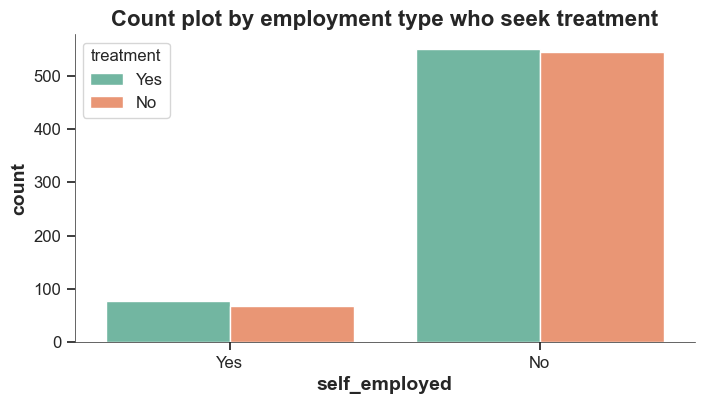

In [14]:
# Analyze employees by employment type.
column = 'self_employed'
title = 'Count plot by employment type who seek treatment'
count_plot_category(survey_df, column, title)

### Finding
- The majority of the respondents reported working for an organization.
- Analysis shows that employment type does not influence whether an employee seek treatment or not.

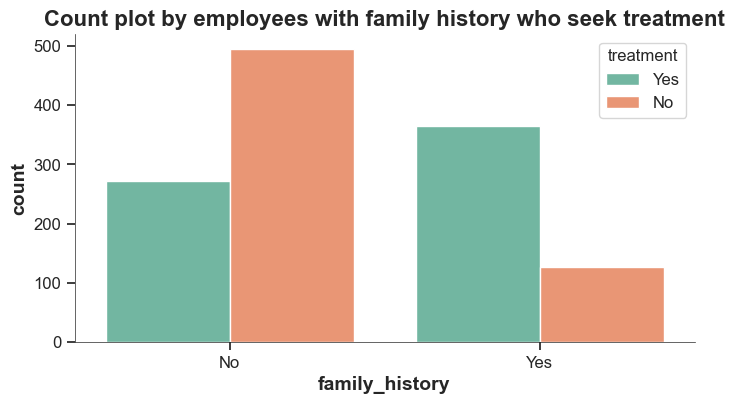

In [15]:
# Analyze employees by family_history.
column = 'family_history'
titles = 'Count plot by employees with family history who seek treatment'
count_plot_category(survey_df, column, titles)

### Finding:
- We can see that employees with a family history of mental illness are more likely to seek treatment.

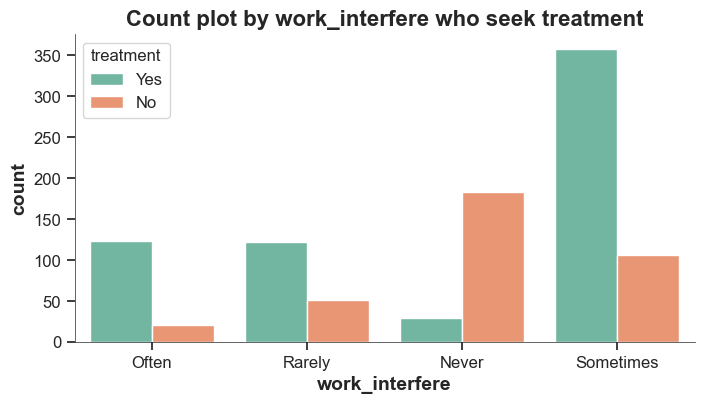

In [16]:
# Analyze employees by work_interfere.
column = 'work_interfere'
titles = 'Count plot by work_interfere who seek treatment'
count_plot_category(survey_df, column, titles)

### Finding:
- Respondents who feel a mental condition interferes with their work are more likely to seek treatment

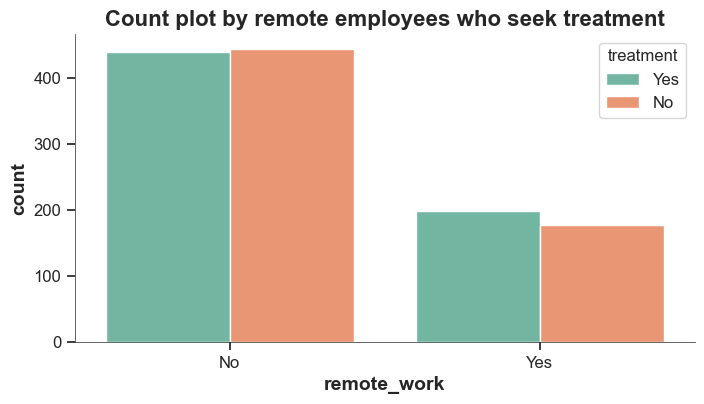

In [17]:
# Analyze employees by remote work.
column = 'remote_work'
titles = 'Count plot by remote employees who seek treatment'
count_plot_category(survey_df, column, titles)

### Finding:
- We can see that whether the employee works remote or not, it does not influence an employee seeking treatment.

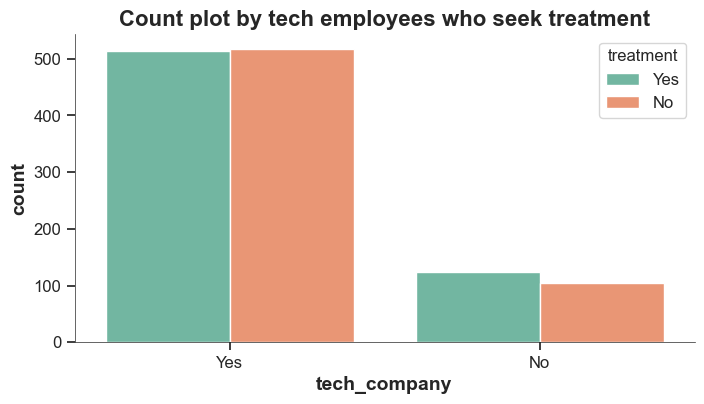

In [18]:
# Analyze employees by tech company.
column = 'tech_company'
titles = 'Count plot by tech employees who seek treatment'
count_plot_category(survey_df, column, titles)

### Finding:
- Although the majority of employees surveyed work in tech companies, this does not influence weather an employee seeks treatment or not.

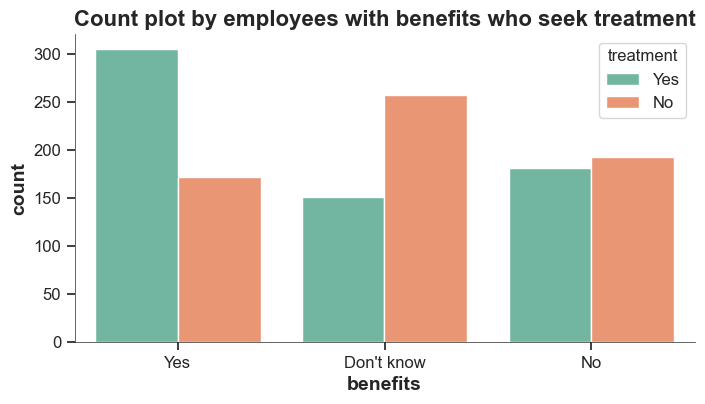

In [19]:
# Analyze employees by benefits.
column = 'benefits'
titles = 'Count plot by employees with benefits who seek treatment'
count_plot_category(survey_df, column, titles)

### Finding:
-  Individuals who are provided with benefits are more likely to seek help if they feel it is needed

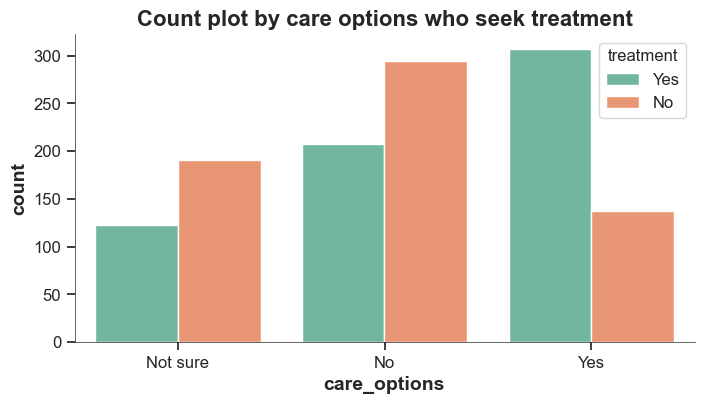

In [20]:
# Analyze employees by care options.
column = 'care_options'
titles = 'Count plot by care options who seek treatment'
count_plot_category(survey_df, column, titles)

### Finding:
- Individuals feel more encouraged to seek help if care options are available

## Data Preparation
The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. Tasks include table, record, and attribute selection, data cleaning, construction of new attributes, and transformation of data for modeling tools.

Drop outliers from age column

In [21]:
survey_df = survey_df[(survey_df['Age'] >= 18) & (survey_df['Age'] <= 60)]

Drop country and state columns since most of the data was collected in the U.S. and we won't be able to infer something about the country of origin.

In [22]:
survey_df = survey_df[survey_df['Country'].isin(['United States'])]
survey_df.drop(columns=['Country', 'state'], inplace=True)

Standardize gender column

In [23]:
dict1 = {
    'male': 'Male', 'M': 'Male', 'm': 'Male', 'Make': 'Male', 'Male ': 'Male', 'Man': 'Male', 'maile': 'Male',
    'msle': 'Male', 'Malr': 'Male', 'Mal': 'Male', 'Mail': 'Male', 'Cis Male': 'Male', 'cis male': 'Male',
    'Male (CIS)': 'Male', 'Cis Man': 'Male', 'female': 'Female', 'F': 'Female', 'f': 'Female', 'Woman': 'Female',
    'femail': 'Female', 'Female ': 'Female', 'Femake': 'Female', 'woman': 'Female', 'Female (cis)': 'Female',
    'Cis Female': 'Female', 'cis-female/femme': 'Female',
}
survey_df.replace({'Gender': dict1}, inplace=True)
survey_df = survey_df[survey_df['Gender'].isin(['Male', 'Female'])]

In [24]:
# Convert target variable to numeric
survey_df.rename(columns={'treatment': 'y'}, inplace=True)
survey_df.replace({'y': {'No': 0, 'Yes': 1}, }, inplace=True)

In [25]:
# Observing numeric ranges from descriptive statistics, we can down cast numeric columns to reduce memory usage
int_cols = survey_df.select_dtypes(include=['int64']).columns.tolist()
survey_df[int_cols] = survey_df[int_cols].apply(pd.to_numeric, downcast='integer')

# Also, we can convert object columns to category type to reduce memory usage
object_cols = survey_df.select_dtypes(include=['object']).columns.tolist()
survey_df[object_cols] = survey_df[object_cols].astype("category")

In [26]:
# Examining structure after cleaning
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        734 non-null    int8    
 1   Gender                     734 non-null    category
 2   self_employed              723 non-null    category
 3   family_history             734 non-null    category
 4   y                          734 non-null    int8    
 5   work_interfere             593 non-null    category
 6   no_employees               734 non-null    category
 7   remote_work                734 non-null    category
 8   tech_company               734 non-null    category
 9   benefits                   734 non-null    category
 10  care_options               734 non-null    category
 11  wellness_program           734 non-null    category
 12  seek_help                  734 non-null    category
 13  anonymity                  734 non

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
# Define preprocessing pipeline to scale numeric columns and apply one-hot encoding to categorical columns
standard_scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

numeric_preprocessor = Pipeline(
    steps=[
        ('imputation_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scale', standard_scaler),
    ],
)

categorical_preprocessor = Pipeline(
    steps=[
        ('imputation_constant', SimpleImputer(fill_value='missing', strategy='constant')),
        ('encode', onehot_encoder),
    ],
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_preprocessor, make_column_selector(dtype_exclude='category')),
        ('categorical', categorical_preprocessor, make_column_selector(dtype_include='category')),
    ],
    verbose_feature_names_out=False,
    sparse_threshold=0,
    verbose=True
)

In [29]:
# Apply preprocessing pipeline
survey_df1 = survey_df.copy()

In [30]:
y = survey_df1['y']
X = survey_df1.drop(columns=['y'])

In [31]:
trans = preprocessor.fit_transform(X)
preprocessor.get_feature_names_out()
X_trans = pd.DataFrame(trans, columns=preprocessor.get_feature_names_out())

[ColumnTransformer] ..... (1 of 2) Processing numerical, total=   0.0s
[ColumnTransformer] ... (2 of 2) Processing categorical, total=   0.0s


In [32]:
# Examine dataset ready for fitting the models
X_trans.head(5)

,Age,Gender_Female,Gender_Male,self_employed_No,self_employed_Yes,self_employed_missing,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,0.540007,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.493790,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.277522,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.005012,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.267497,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Modeling

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.inspection import permutation_importance

In [34]:
# Split bank dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=42)

Before we build our first model, we want to establish a baseline.

In [35]:
# This classifier serves as a simple baseline to compare against other more complex classifiers
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)

baseline_score = dummy_clf.score(X_test, y_test)
print(f'Baseline accuracy score: {baseline_score.round(2)}')

Baseline accuracy score: 0.54


We will use Logistic Regression to build the first model.

In [36]:
# Define estimator pipeline for a basic model
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train, y_train)

# Examine initial score for the first model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score: {accuracy: .2f}')

Test Accuracy Score:  0.86


Performing model comparison

In [37]:
# Define dataframe to store results for different models
model_results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

In [38]:
# Create list of models for evaluation and comparison
names = [
    'K-Nearest Neighbors',
    'Logistic Regression',
    'Decision Tree',
    'Support Vector Machine',
]

classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    SVC(),
]

In [39]:
# Train and score models
i = 0
for name, clf in zip(names, classifiers):
    begin = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    total = round(end - begin, 3)
    print(f'{name} completed in {total}s')
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    new_row = pd.DataFrame(
        {
            'Model': name,
            'Train Time': total,
            'Train Accuracy': train_accuracy.round(2),
            'Test Accuracy': test_accuracy.round(2),
        },
        index=[i]
    )
    i = i + 1
    model_results = pd.concat([model_results, new_row])

K-Nearest Neighbors completed in 0.004s
Logistic Regression completed in 0.022s
Decision Tree completed in 0.007s
Support Vector Machine completed in 0.028s


In [40]:
# Display model scores
model_results

,Model,Train Time,Train Accuracy,Test Accuracy
0,K-Nearest Neighbors,0.004,0.83,0.79
1,Logistic Regression,0.022,0.87,0.86
2,Decision Tree,0.007,1.00,0.82
3,Support Vector Machine,0.028,0.89,0.89


### Findings:
- Logistic Regression and Support Vector Machine performed the best
- Decision Tree overt fit the training dataset

## Model Improvement

In [41]:
# Define table for grid search results
grid_search_results = pd.DataFrame(
    columns=['Model', 'Best Parameters', 'Best Score']
)

In [42]:
# Define list of grid parameters for each model evaluated
params_grid = [
    # K-Nearest Neighbors parameters
    {
        'n_neighbors': range(2, 31),
    },
    # Logistic Regression parameters
    {
        'C': np.logspace(-4, 4, 20),
        'penalty': ['l1', 'l2'],  # l1=lasso, l2=ridge
        'solver': ['liblinear'],
        'max_iter': [1000]
    },
    # 'Decision Tree parameters
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    },
    # Support Vector Machine parameters
    {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 10],
        'kernel': ['rbf']
    }
]

In [43]:
# Perform grid search for each model
i = 0
for name, clf, param_grid in zip(names, classifiers, params_grid):
    grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search = grid.fit(X_train, y_train)
    best_score = grid_search.best_score_
    print(f'Grid search for {name} completed, best score is: {best_score:.2f}')
    new_row = pd.DataFrame(
        {
            'Model': name,
            'Best Parameters': str(grid_search.best_params_),
            'Best Score': best_score.round(2),
        },
        index=[i]
    )
    grid_search_results = pd.concat([grid_search_results, new_row])
    i = i + 1

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Grid search for K-Nearest Neighbors completed, best score is: 0.77
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Grid search for Logistic Regression completed, best score is: 0.85
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Grid search for Decision Tree completed, best score is: 0.84
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Grid search for Support Vector Machine completed, best score is: 0.84


In [44]:
# Display metrics and parameters for best model using grid search
grid_search_results

,Model,Best Parameters,Best Score
0,K-Nearest Neighbors,{'n_neighbors': 25},0.77
1,Logistic Regression,"{'C': 0.615848211066026, 'max_iter': 1000, 'pe...",0.85
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 2}",0.84
3,Support Vector Machine,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.84


[Text(0, 0, '0.77'),
 Text(0, 0, '0.84'),
 Text(0, 0, '0.84'),
 Text(0, 0, '0.85')]

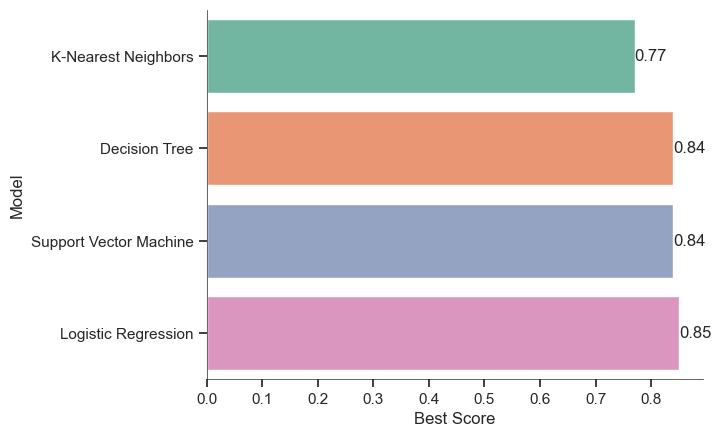

In [45]:
grid_search_results.sort_values(by=['Best Score'], inplace=True)
ax = sns.barplot(data=grid_search_results, x='Best Score', y='Model')
ax.bar_label(ax.containers[0])

# Final Model

In [46]:
# Define estimator
final_model = LogisticRegression(C=0.09, max_iter=1000, penalty='l1', solver='liblinear')
# Fit the model
final_model.fit(X_train, y_train)

LogisticRegression(C=0.09, max_iter=1000, penalty='l1', solver='liblinear')

In [47]:
# Examine accuracy score for the final model
y_test_pred = final_model.predict(X_test)
test_accuracy_score = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy Score: {test_accuracy_score: .2f}')

Test Accuracy Score:  0.88


In [48]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        84
           1       0.85      0.95      0.90       100

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.88       184
weighted avg       0.89      0.88      0.88       184



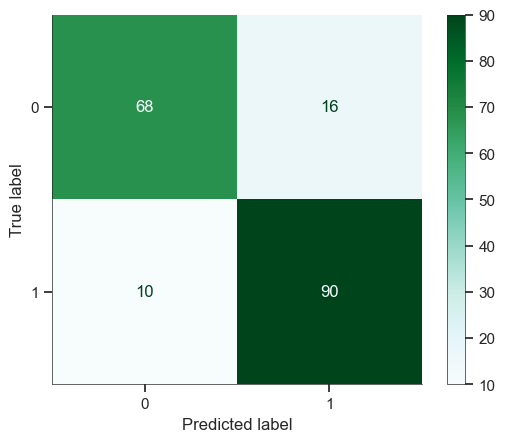

In [49]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.BuGn)

In [50]:
# Display ROC and Precision-Recall Curves for better understanding
y_score = final_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=final_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='Logistic Regression')

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=final_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, estimator_name='Logistic Regression')

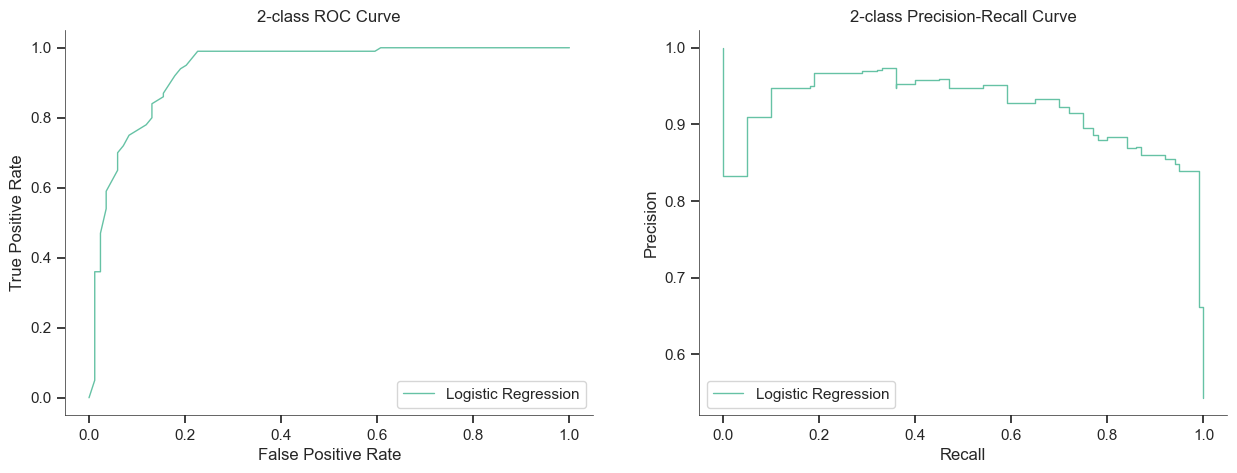

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

roc_display.plot(ax=ax1)
roc_display.ax_.set_title('2-class ROC Curve')

pr_display.plot(ax=ax2)
pr_display.ax_.set_title('2-class Precision-Recall Curve')

plt.show()

Identy feature importance based on model coefficients to better understand and explain the final model

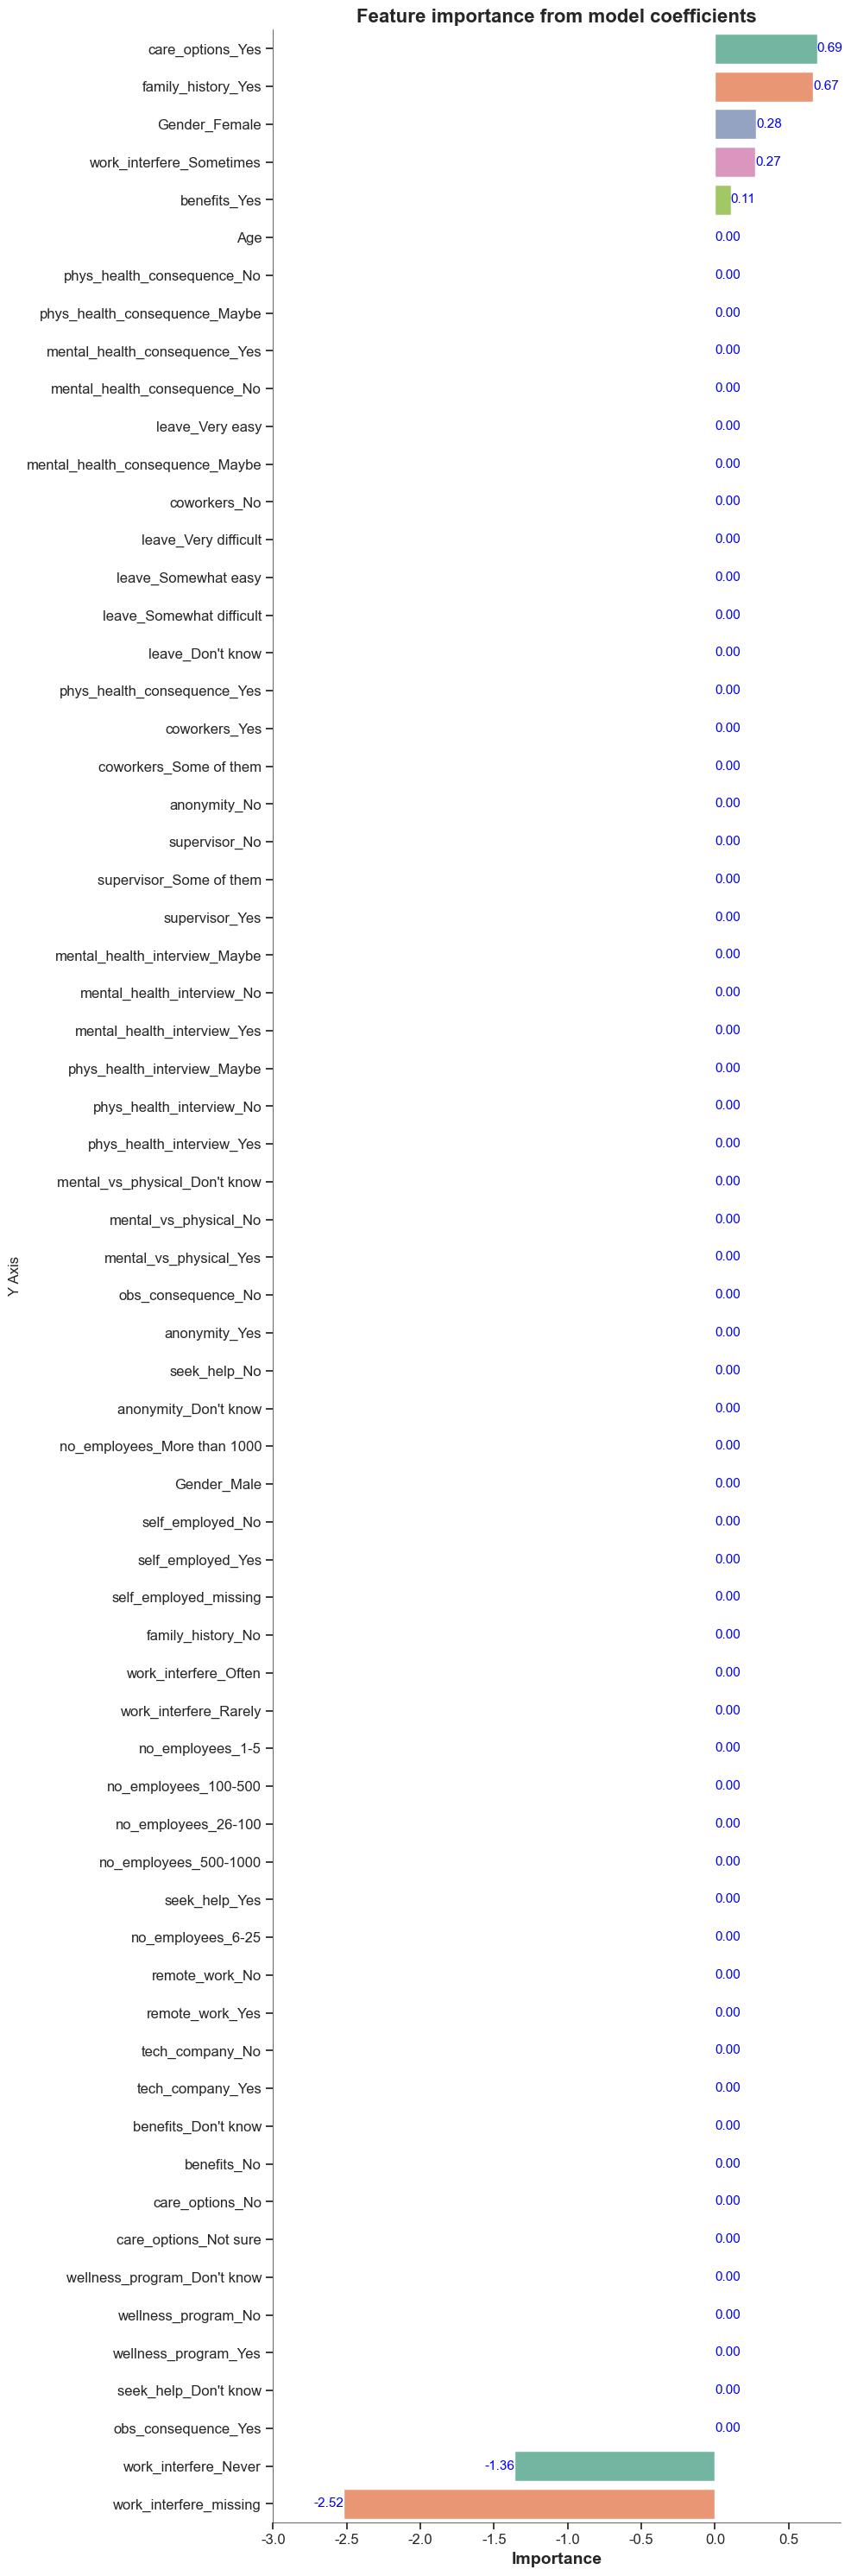

In [52]:
importance = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': final_model.coef_[0]
})
importance.sort_values(by='Importance', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10, 30))

sns.barplot(data=importance, x='Importance', y='Attribute', orient='h', ax=ax, palette='Set2')
sns.despine(fig)

# set title
ax.set_title('Feature importance from model coefficients', fontsize=16, fontweight='bold')
# add bar labels
container = ax.containers[0]
labels = ["{:.2f}".format(val) for val in container.datavalues]
ax.bar_label(container, labels=labels, label_type='edge', fontsize=11, color='blue')
# define xy labels
ax.set_ylabel('Y Axis')
ax.set_xlabel('Importance', fontsize=14, fontweight='bold')
# set x ticks
ticks = np.arange(-3.0, 1.0, 0.5)
tick_labels = ["{:.1f}".format(val) for val in ticks]
ax.set_xticks(ticks, tick_labels)
ax.tick_params(axis='both', labelsize=12)
# remove legend
ax.legend([])
ax.get_legend().remove()

plt.tight_layout()
plt.show()

### Findings: After identifying the importance of the model features.
- These are the top predictors for an individual to seek treatment in case of experiencing a mental health issue.
  - The employer offers care options for mental health.
  - The individual has a family history of mental illness.
  - The individual feels that a mental condition interferes with work.
  - The employer provides benefits for mental health.
- The following factors do not influence whether individuals who experience a mental condition seek treatment or not.
  - They are self-employed.
  - They work for a tech company.
  - They work remotely.